In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(42)

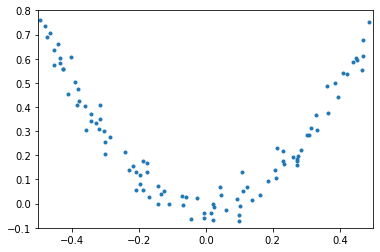

In [2]:
x = np.random.rand(100, 1) - 0.5
y = 3 * x[:, 0]**2 + 0.05 * np.random.randn(100)

def plot_data(axis=[-0.5, 0.5, -0.1, 0.8]):
    plt.plot(x, y, '.')
    plt.axis(axis)
    
plot_data()

Manual

In [3]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(x, y)

y2 = y - tree_reg1.predict(x)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(x, y2)

y3 = y2 - tree_reg2.predict(x)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(x, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [4]:
x_test = [[0.8]]
y_pred = sum(tree.predict(x_test) for tree in (tree_reg1, tree_reg2, tree_reg3))
print(y_pred)

[0.75026781]


In [5]:
def plot_decision_boundary(regs, x=x, y=y, axis=[-0.5, 0.5, -0.1, 0.8]):
    if not isinstance(regs, list):
        regs = [regs]
        
    plt.plot(x, y, '.')
    x1 = np.linspace(axis[0], axis[1], 500)
    y_pred = sum(reg.predict(x1.reshape(-1, 1)) for reg in regs)
    plt.plot(x1, y_pred)
    plt.axis(axis)

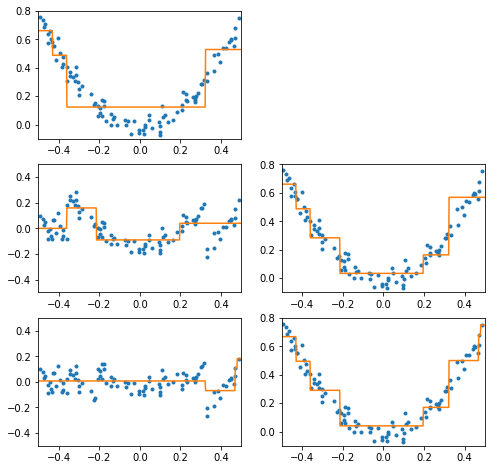

In [6]:
plt.figure(figsize=(8, 8))

plt.subplot(3, 2, 1)
plot_decision_boundary([tree_reg1], x, y)

plt.subplot(3, 2, 3)
plot_decision_boundary([tree_reg2], x, y2, [-0.5, 0.5, -0.5, 0.5])

plt.subplot(3, 2, 4)
plot_decision_boundary([tree_reg1, tree_reg2], x, y)

plt.subplot(3, 2, 5)
plot_decision_boundary([tree_reg3], x, y3, [-0.5, 0.5, -0.5, 0.5])

plt.subplot(3, 2, 6)
plot_decision_boundary([tree_reg1, tree_reg2, tree_reg3], x, y)

GradientBoostingRegressor

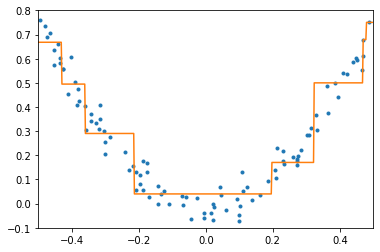

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

gbr1 = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbr1.fit(x, y)

plot_decision_boundary(gbr1)

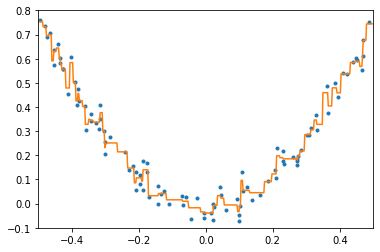

In [8]:
gbr2 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbr2.fit(x, y)

plot_decision_boundary(gbr2)

Early stopping

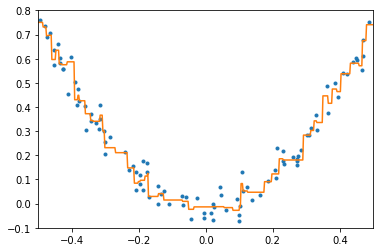

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=49)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbr.fit(x_train, y_train)

plot_decision_boundary(gbr)

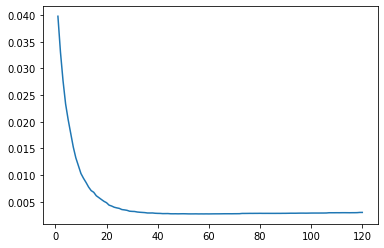

In [10]:
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbr.staged_predict(x_val)]

plt.figure()
plt.plot(range(1, len(errors)+1), errors)
plt.show()

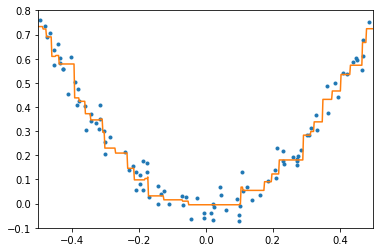

In [11]:
best_n_estimators = np.argmin(errors) + 1

gbr_best = GradientBoostingRegressor(max_depth=2,n_estimators=best_n_estimators, random_state=42)
gbr_best.fit(x_train, y_train)

plot_decision_boundary(gbr_best)